## **Assignment**-**1**

Submitted by Divya Nellepalli(dn23d)

# MLP with Dropout

## Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [5]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [8]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([8, 1, 1, 3, 6, 6, 8, 8, 8, 1])


## Model

In [9]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3093
Epoch: 001/050 | Batch 0050/0210 | Loss: 1.8443
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.7622
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.6539
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.5036
Epoch: 001/050 | Train: 86.56% | Validation: 89.12%
Time elapsed: 0.35 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.4685
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.4341
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.3330
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.3330
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.3604
Epoch: 002/050 | Train: 90.23% | Validation: 92.15%
Time elapsed: 0.64 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.2568
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.2746
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2673
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.2206
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.3525
Epoch: 003/050 | Train: 91.09% | Validation: 92.57%
Time elapsed: 0.94 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.3443
Epoch: 

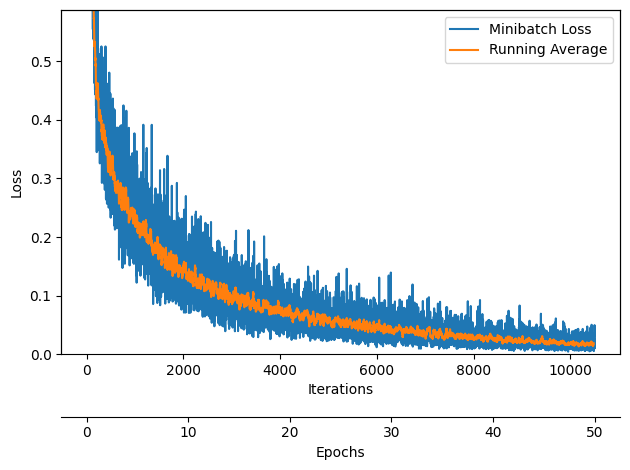

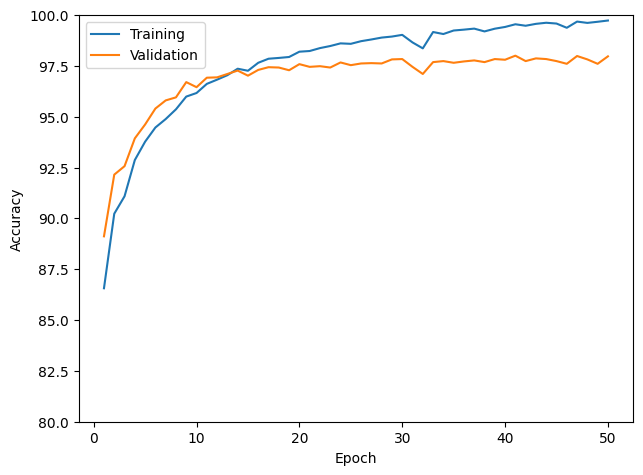

In [10]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.0,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)

plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([80, 100])
plt.show()

## With 50% Dropout

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3132
Epoch: 001/050 | Batch 0050/0210 | Loss: 2.0828
Epoch: 001/050 | Batch 0100/0210 | Loss: 1.5250
Epoch: 001/050 | Batch 0150/0210 | Loss: 1.2467
Epoch: 001/050 | Batch 0200/0210 | Loss: 1.0186
Epoch: 001/050 | Train: 82.36% | Validation: 85.47%
Time elapsed: 0.30 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.9355
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.9608
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.7889
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.7475
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.6573
Epoch: 002/050 | Train: 88.25% | Validation: 90.50%
Time elapsed: 0.60 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.7553
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.6540
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.5696
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.7052
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.5454
Epoch: 003/050 | Train: 90.20% | Validation: 92.08%
Time elapsed: 0.89 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.6222
Epoch: 

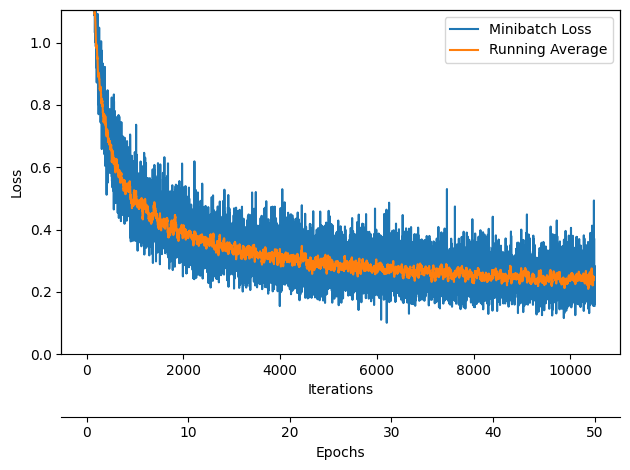

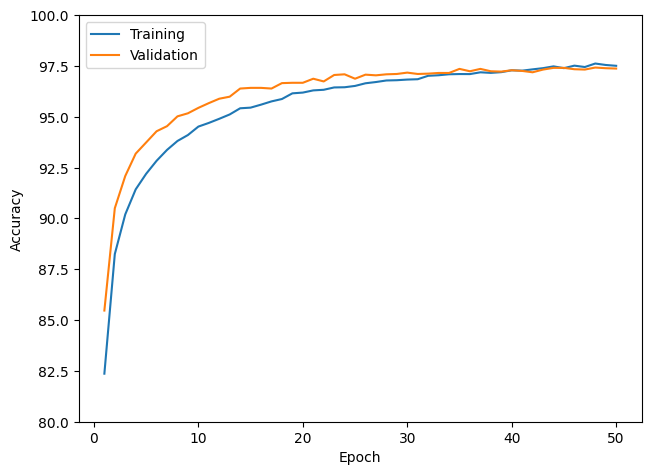

In [11]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

# **Batch** **Normalization**

In [22]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1, bias=False),
            torch.nn.BatchNorm1d(num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2, bias=False),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits


Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3559
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.4216
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3420
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.2311
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.2121
Epoch: 001/050 | Train: 95.71% | Validation: 96.55%
Time elapsed: 0.38 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1470
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.2062
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1260
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1255
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1484
Epoch: 002/050 | Train: 97.42% | Validation: 97.32%
Time elapsed: 0.68 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.1065
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0846
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0887
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0743
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.1047
Epoch: 003/050 | Train: 97.96% | Validation: 97.52%
Time elapsed: 0.98 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0679
Epoch: 

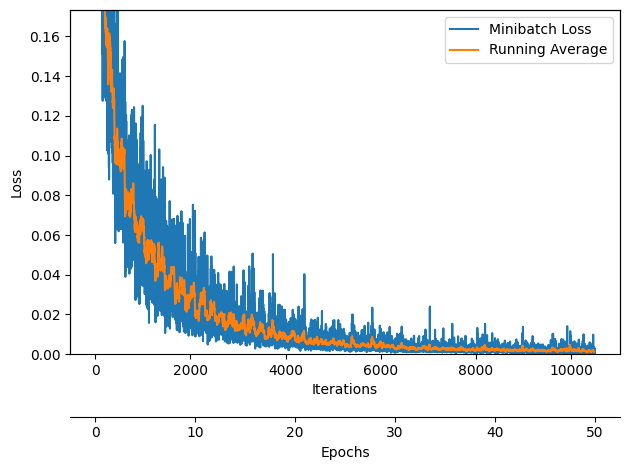

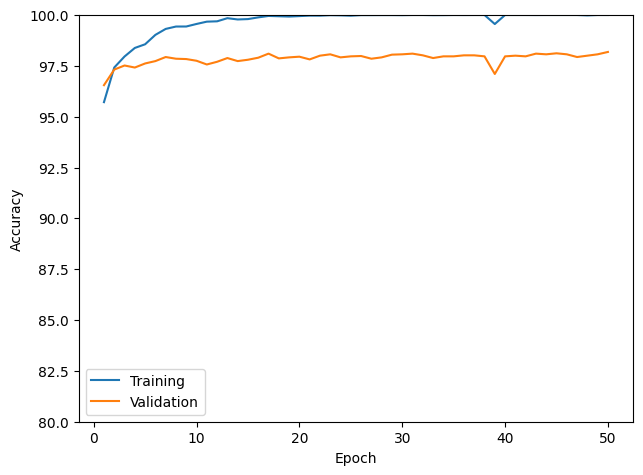

In [13]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

**Weight_kaiming**

In [17]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits


Epoch: 001/050 | Batch 0000/0210 | Loss: 2.6304
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.6442
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3852
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.3313
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.2585
Epoch: 001/050 | Train: 90.83% | Validation: 92.57%
Time elapsed: 0.31 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.2815
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.3328
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.2883
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.2684
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.2473
Epoch: 002/050 | Train: 92.97% | Validation: 94.52%
Time elapsed: 0.62 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.2372
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.2117
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2544
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.2412
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.2204
Epoch: 003/050 | Train: 93.90% | Validation: 94.80%
Time elapsed: 0.92 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.2234
Epoch: 

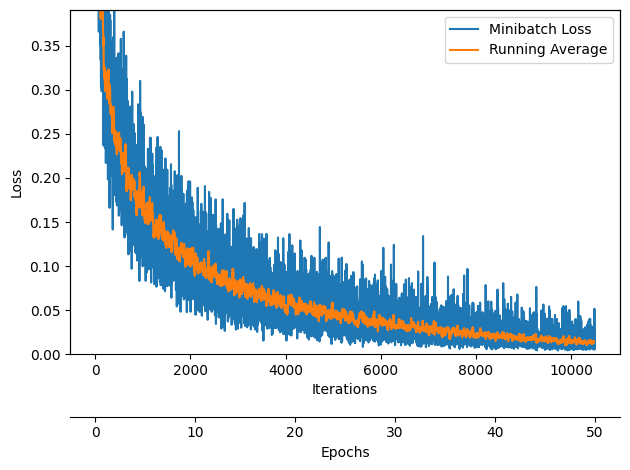

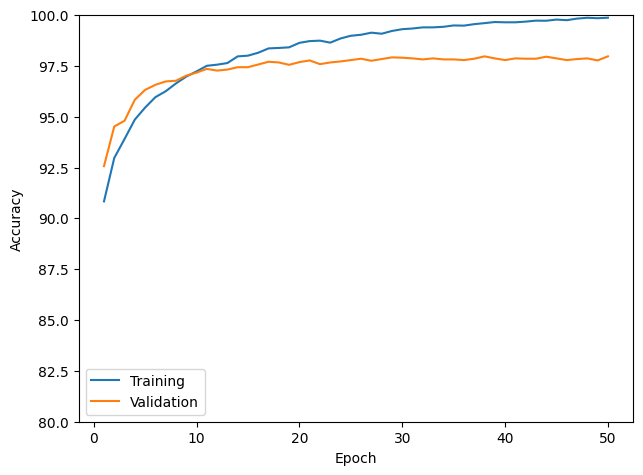

In [18]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

**Weight_nomal**-**batch_Normalization**

In [19]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1, bias=False),
            torch.nn.BatchNorm1d(num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2, bias=False),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                m.weight.detach().normal_(0, 0.001)
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3027
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.6020
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.2182
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.1909
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1895
Epoch: 001/050 | Train: 96.47% | Validation: 96.58%
Time elapsed: 0.31 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1249
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.1190
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1487
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1231
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1112
Epoch: 002/050 | Train: 97.54% | Validation: 97.43%
Time elapsed: 0.61 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.1319
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0694
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0776
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0787
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.0606
Epoch: 003/050 | Train: 98.52% | Validation: 97.72%
Time elapsed: 0.92 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0390
Epoch: 

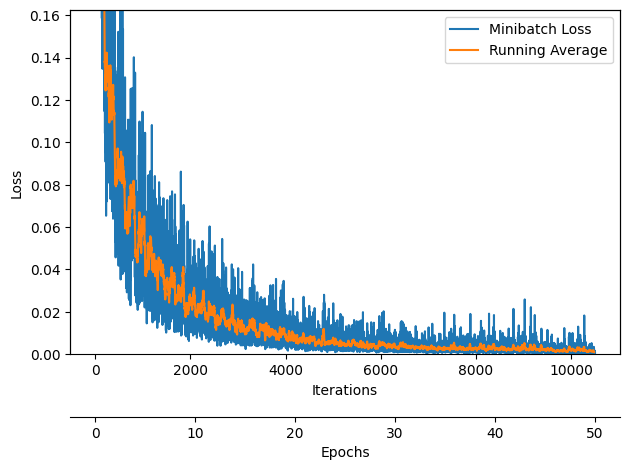

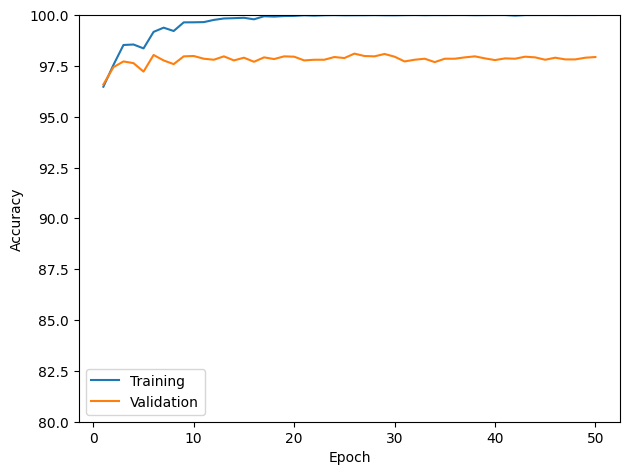

In [20]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

**Weight_Normalization**

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3026
Epoch: 001/050 | Batch 0050/0210 | Loss: 2.3003
Epoch: 001/050 | Batch 0100/0210 | Loss: 2.3044
Epoch: 001/050 | Batch 0150/0210 | Loss: 2.2988
Epoch: 001/050 | Batch 0200/0210 | Loss: 2.2980
Epoch: 001/050 | Train: 11.31% | Validation: 10.50%
Time elapsed: 0.37 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 2.3005
Epoch: 002/050 | Batch 0050/0210 | Loss: 2.2974
Epoch: 002/050 | Batch 0100/0210 | Loss: 2.3039
Epoch: 002/050 | Batch 0150/0210 | Loss: 2.3035
Epoch: 002/050 | Batch 0200/0210 | Loss: 2.3043
Epoch: 002/050 | Train: 11.31% | Validation: 10.50%
Time elapsed: 0.68 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 2.3041
Epoch: 003/050 | Batch 0050/0210 | Loss: 2.3008
Epoch: 003/050 | Batch 0100/0210 | Loss: 2.3050
Epoch: 003/050 | Batch 0150/0210 | Loss: 2.2976
Epoch: 003/050 | Batch 0200/0210 | Loss: 2.2991
Epoch: 003/050 | Train: 11.32% | Validation: 10.50%
Time elapsed: 1.02 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 2.2990
Epoch: 

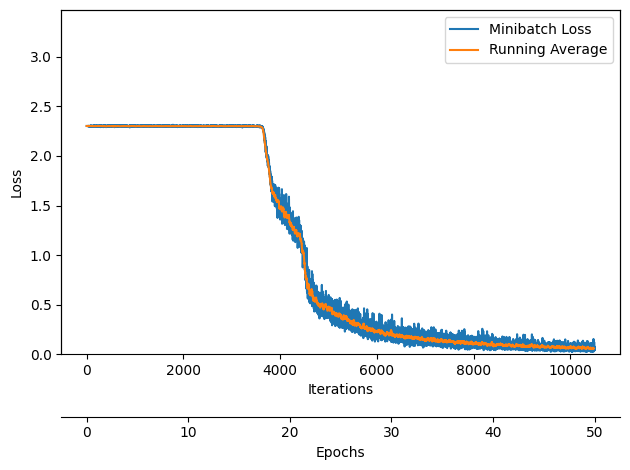

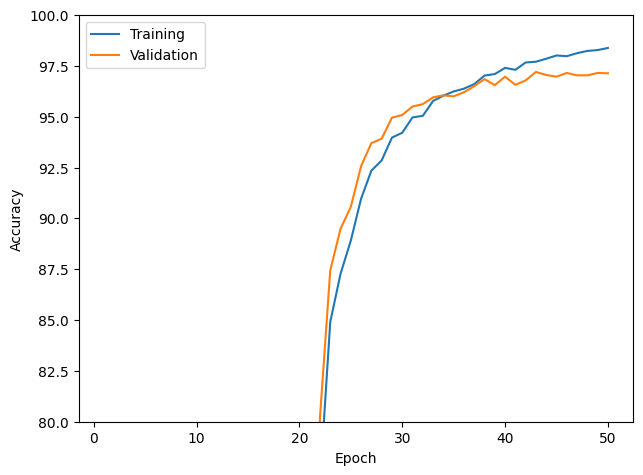

In [21]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                m.weight.detach().normal_(0, 0.001)
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()
